<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [90]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Load the dataset into a dataframe.


In [91]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:ylabel='Density'>

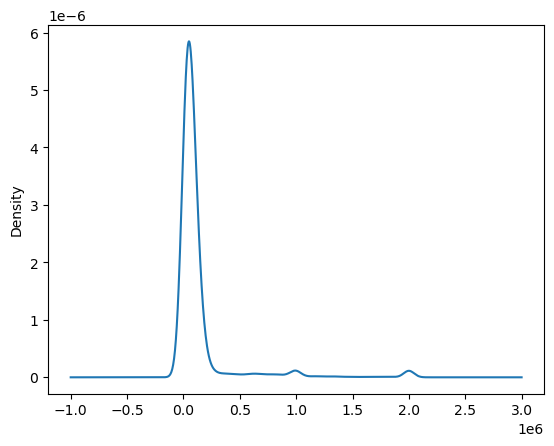

In [92]:
# your code goes here
df['ConvertedComp'].plot.density()

Plot the histogram for the column `ConvertedComp`.


(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

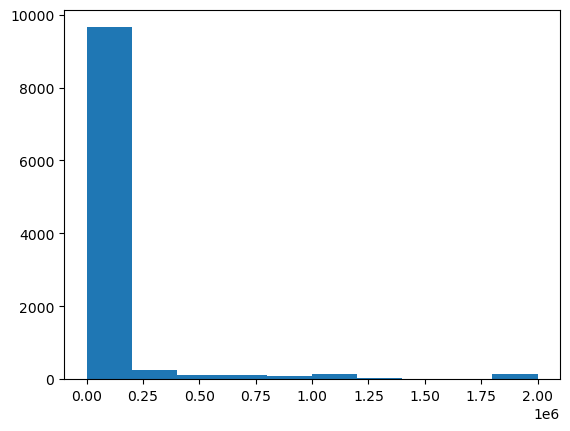

In [93]:
# your code goes here
plt.hist(df['ConvertedComp'])

What is the median of the column `ConvertedComp`?


In [94]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [95]:
# your code goes here
df["Gender"].value_counts()
#10480 Men

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [96]:
# your code goes here
Woman = df[df['Gender'] == 'Woman']
Woman["ConvertedComp"].median()
#57708

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [97]:
# your code goes here
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
print("Min: ", df['Age'].min())
print("Q1: ", Q1)
print("Median: ", df['Age'].median())
print("Q3: ", Q3)
print("Max: ", df['Age'].max())

Min:  16.0
Q1:  25.0
Median:  29.0
Q3:  35.0
Max:  99.0


Plot a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

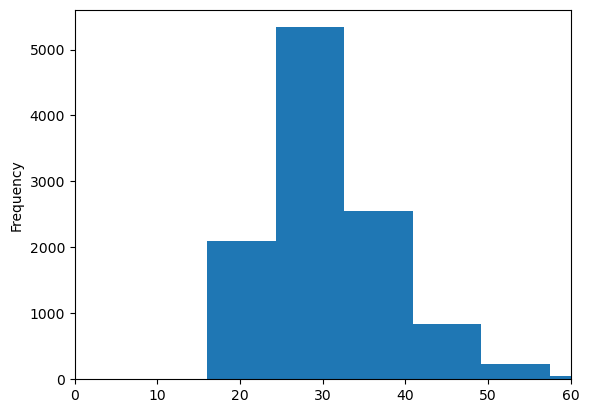

In [98]:
# your code goes here
df['Age'].plot.hist(xlim=(0, 60))

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

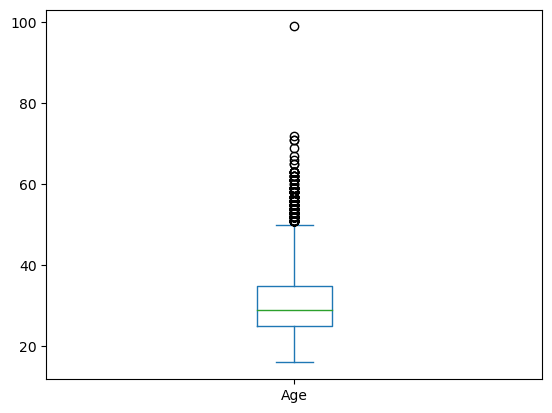

In [99]:
# your code goes here
df['Age'].plot.box()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [100]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3-Q1
print("IQR: ", IQR)

IQR:  73132.0


Find out the upper and lower bounds.


In [101]:
# your code goes here
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)
print("Upper: ", upper)
print("Lower: ", lower)

Upper:  209698.0
Lower:  -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [102]:
# your code goes here
outliers = df[~df["ConvertedComp"].between(lower,upper)]
print(len(outliers))

1695


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [119]:
# your code goes here
df1 = df.drop(outliers.index)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
13,32,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,Associate degree,"Information systems, information technology, o...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,21.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
35,80,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United Kingdom,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,NaN,24.0,Man,No,Straight / Heterosexual,Biracial,No,Appropriate in length,Neither easy nor difficult
45,100,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Canada,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,39.0,Woman,No,Bisexual,White or of European descent,No,Appropriate in length,Easy
46,102,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,37.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11369,25086,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Germany,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Another engineering discipline (ex. civil, ele...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
11370,25087,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,India,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,23.0,Man,No,Straight / Heterosexual,East Asian,Yes,Too long,Easy
11377,25101,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Belgium,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers,35.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
11380,25109,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Albania,"Yes, full-time","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Cour...,21.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate

### Finding correlation


Find the correlation between `Age` and all other numerical columns.


<AxesSubplot:>

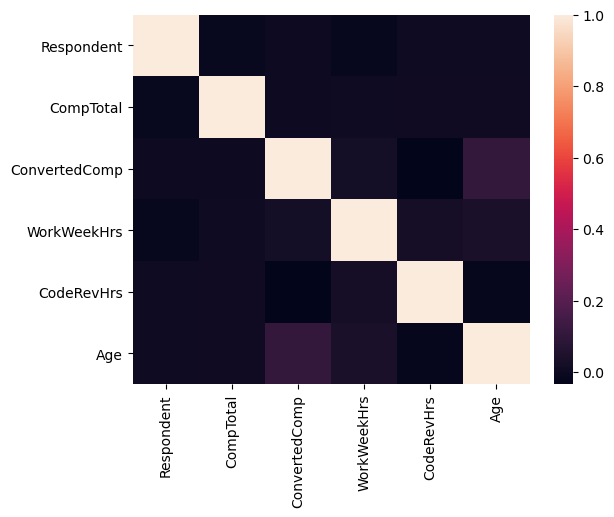

In [104]:
# your code goes here
num_cols= df1.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_cols.corr()
sns.heatmap(corr_matrix)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
